In [1]:
import pandas as pd
import os
import numpy as np

THRESHOLD = 2
ROWS = 0
COLUMNS = 1

# depending on the OS the path to the data file is different
if os.name == 'nt':
    data = pd.read_excel(r'..\data\nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')
elif os.name == 'posix':
    data = pd.read_excel(r'../data/nutrient-file-release2-jan22.xlsx', sheet_name='All solids & liquids per 100g')

# replace 0 with NaN
data = data.replace({0: np.nan})
    
# get the list of row/column names before dropping
before_rows = data.values.tolist()
before_cols = data.columns.tolist()

# remove rows/columns with less than (THRESHOLD) non-null values
data = data.dropna(thresh=THRESHOLD, axis=ROWS)
data = data.dropna(thresh=THRESHOLD, axis=COLUMNS)

# get the list of row/column names after dropping
after_rows = data.values.tolist()
after_cols = data.columns.tolist()

# find the removed rows/columns
removed_rows = [row for row in before_rows if row not in after_rows]
removed_cols = [col for col in before_cols if col not in after_cols]

# print the removed rows/columns
print("why no print")
print("Removed" , len(removed_rows), "rows:", removed_rows)
print("Removed" , len(removed_cols), "columns:", removed_cols)
print(":(")

why no print
Removed 1616 rows: [['F002258', 31302.0, 'Cardamom seed, dried, ground', 1236.0, 1012.0, 8.3, 10.8, 1.72, 6.7, 5.8, 28.0, nan, nan, nan, nan, nan, nan, nan, nan, 4.4, nan, nan, 30.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 34.4, 34.4, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 383.0, nan, nan, nan, nan, nan, nan, 13.97, nan, 229.0, nan, nan, nan, nan, 178.0, 1119.0, 11.7, 18.0, nan, nan, 7.47, nan, nan, 22.0, nan, 22.0, 4.0, nan, nan, nan, 0.198, 0.182, 1.1, 2.64, 3.74, nan, 0.23, nan, nan, 3.0, nan, 3.0, 3.0, 21.0, nan, nan, nan, nan, nan, 2.8, nan, nan, nan, nan, nan, nan, nan, 2.85, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 34.34, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 43.94, nan, nan, nan, 15.6, 6.1, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

## $k$-NN

In [253]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# split data into train and test sets
train, test = train_test_split(data, test_size=0.2)

In [254]:
# use nutrition columns as features
X_COLS = list(data.columns[3:])

# use classification column as target
y_COL = data.columns[1]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

X_COLS: ['Energy with dietary fibre, equated \n(kJ)', 'Energy, without dietary fibre, equated \n(kJ)', 'Moisture (water) \n(g)', 'Protein \n(g)', 'Nitrogen \n(g)', 'Fat, total \n(g)', 'Ash \n(g)', 'Total dietary fibre \n(g)', 'Alcohol \n(g)', 'Fructose \n(g)', 'Glucose \n(g)', 'Sucrose\n(g)', 'Maltose \n(g)', 'Lactose \n(g)', 'Galactose \n(g)', 'Maltotrios \n(g)', 'Total sugars (g)', 'Added sugars (g)', 'Free sugars \n(g)', 'Starch \n(g)', 'Dextrin \n(g)', 'Glycogen \n(g)', 'Inulin \n(g)', 'Mannitol \n(g)', 'Maltodextrin (g)', 'Raffinose \n(g)', 'Stachyose \n(g)', 'Sorbitol \n(g)', 'Resistant starch \n(g)', 'Available carbohydrate, without sugar alcohols \n(g)', 'Available carbohydrate, with sugar alcohols \n(g)', 'Acetic acid \n(g)', 'Citric acid \n(g)', 'Lactic acid \n(g)', 'Malic acid\n (g)', 'Oxalic acid \n(g)', 'Propionic acid \n(g)', 'Quinic acid \n(g)', 'Succinic acid \n(g)', 'Tartaric acid \n(g)', 'Aluminium (Al) \n(ug)', 'Antimony (Sb) \n(ug)', 'Arsenic (As) \n(ug)', 'Cadmium 

In [255]:
# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
print(f"X_train: {X_train.head()}")
print("Labels:", y_train.iloc[:5].reset_index(drop=True).values)

# sample some rows of test set and their labels
print(f"X_test: {X_test.head()}")
print("Labels:", y_test.iloc[:5].reset_index(drop=True).values)

X_train:       Energy with dietary fibre, equated \n(kJ)   
214                                      1418.0  \
1600                                       74.0   
759                                       420.0   
1069                                     1104.0   
571                                       310.0   

      Energy, without dietary fibre, equated \n(kJ)  Moisture (water) \n(g)   
214                                          1322.0                     6.1  \
1600                                           64.0                    94.2   
759                                           420.0                    72.5   
1069                                         1095.0                    48.4   
571                                           296.0                    78.8   

      Protein \n(g)  Nitrogen \n(g)  Fat, total \n(g)  Ash \n(g)   
214            11.9            2.04               2.3        1.9  \
1600            1.0            0.16               0.1        0.6   
759  

In [256]:
from sklearn.neighbors import KNeighborsClassifier

# create knn with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

# train the model using the training set
knn.fit(X_train, y_train)

C:\Users\willi\AppData\Local\Temp\ipykernel_20048\2454431819.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(0, inplace=True)
C:\Users\willi\AppData\Local\Temp\ipykernel_20048\2454431819.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.fillna(0, inplace=True)


KNeighborsClassifier(n_neighbors=3)

In [257]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# predict the labels of the test set
y_pred = knn.predict(X_test)

# print the predictions
print(f"First 5 predictions: {y_pred[:5]}")

First 5 predictions: [18302. 24302. 22201. 24201. 12101.]


In [258]:
# check the accuracy
from sklearn.metrics import accuracy_score

# y_test constains the true labels of the test set
# y_pred contains the predicted labels of the test set
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.42592592592592593


KeyboardInterrupt: 

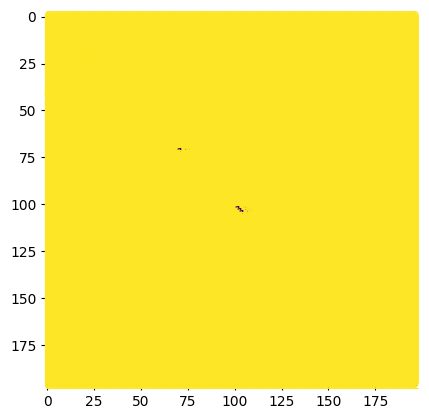

In [259]:
# show confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# create a confusion matrix using crosstab
cm2 = pd.crosstab(y_test, y_pred)
#print(cm2)

# create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)

# plot confusion matrix
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# plot the confusion matrix using seaborn
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# both these plots are cursed mfs

# Linear Regression

In [ ]:
import random
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data, test_size=0.2)

# sample some rows of training set
X_train.sample(10)

In [ ]:
X_COLS = list(data.columns[5:])
y_COL = data.columns[4]

print(f"X_COLS: {X_COLS}")
print(f"y_COL: {y_COL}")

# create design matrix X and predictions y
X_train = train[X_COLS]
y_train = train[y_COL]
X_test = test[X_COLS]
y_test = test[y_COL]

# sample some rows of training set and their labels
X_train.head()
y_train.head()

In [ ]:
# create and fit linear model
lm = LinearRegression()

# replace NaN values with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)
y_train.fillna(0, inplace=True)
y_test.fillna(0, inplace=True)

lm.fit(X_train, y_train)

In [ ]:
# get intercepts and coefficients
print(f"Intercept: {lm.intercept_}")
print(f"Coefficients: {lm.coef_}")

# get the MSE
y_pred = lm.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

In [ ]:
# visualise
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()